# Q)-1 Delivery_time -> Predict delivery time using sorting time

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [100]:
df=pd.read_csv('delivery_time.csv')
df


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [101]:
df=df.rename(columns={'Delivery Time': 'Delivery_Time','Sorting Time':'Sorting_Time'})
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Basic EDA

In [102]:
df.shape

(21, 2)

In [103]:
type(df)

pandas.core.frame.DataFrame

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [105]:
# dataset has zero null value and datatype also identified accurate

In [106]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# outlier detection and treatment

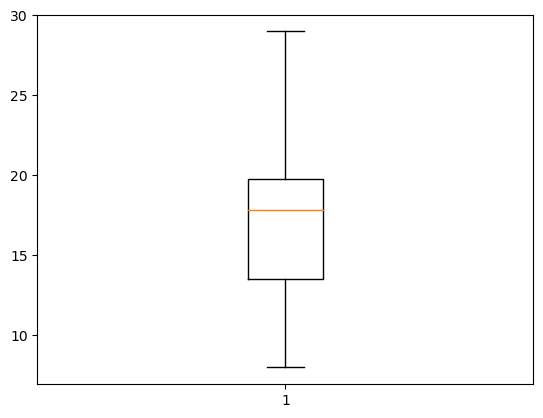

In [107]:
plt.boxplot(df['Delivery_Time']);

-Inference

from above boxplot thier is no outlier.

Data is slightly left skewed.

Most of the data is between 14 to 20 and mean is 18

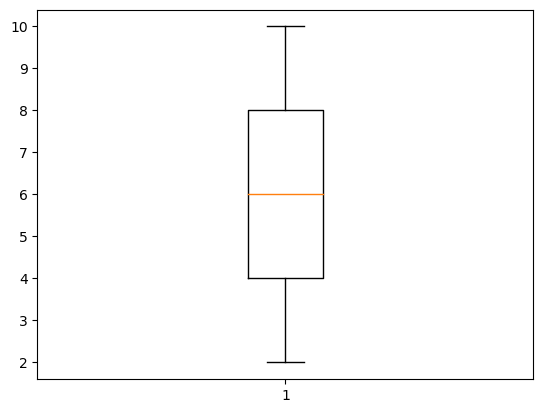

In [108]:
plt.boxplot(df['Sorting_Time']);

-Inference

from above boxplot thier is no outlier.

Data is normally distributed

Most of the data is between 4 to 8 and mean is 6

# Data Transformation=skew

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


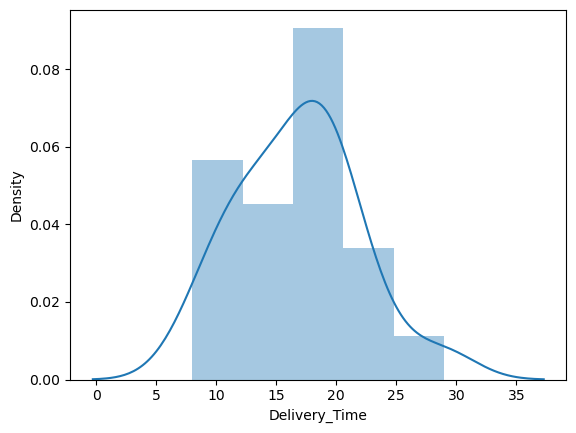

In [109]:
sns.distplot(df['Delivery_Time']); 

In [110]:
df['Delivery_Time'].skew()

0.3523900822831107

In [111]:
df['Sorting_Time'].skew()

0.047115474210530174

In [112]:
df=df.drop_duplicates()
df.shape

(21, 2)

In [113]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


-feature and target has 84% correlation which is very good.

# Prediction Model

In [114]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df).fit() 

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

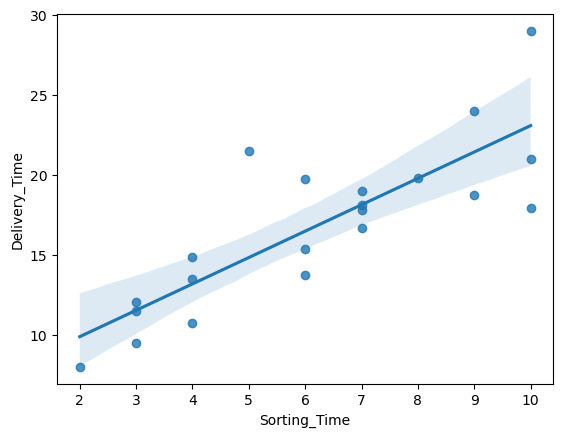

In [115]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=df)

In [116]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [117]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [118]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [119]:
import numpy as np
df['Delivery_Time']=np.sqrt(df['Delivery_Time'])

In [120]:
df['Delivery_Time'].skew()

-0.0618105135865213

In [121]:
import statsmodels.formula.api as smf
model1 = smf.ols("Delivery_Time~Sorting_Time",data = df).fit() 

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

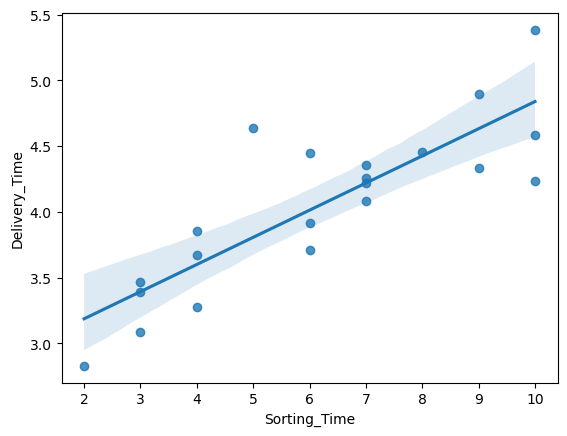

In [122]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=df)

In [123]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.704049871541756, 0.6884735489913221)

In [124]:
df.Sorting_Time=np.sqrt(df.Sorting_Time)

In [125]:
import statsmodels.formula.api as smf
model2 = smf.ols("Delivery_Time~Sorting_Time",data = df).fit() 

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

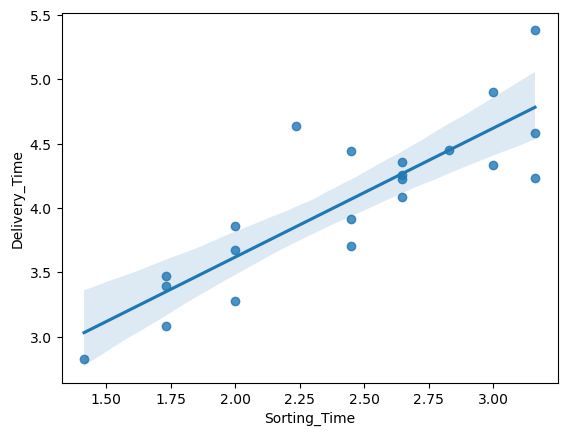

In [126]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=df)

In [127]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

In [128]:
df["Sorting_Time_Sq"] = df.Sorting_Time*df.Sorting_Time
model3 = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_Sq",data=df).fit()

In [129]:
print(model3.tvalues,'\n',model3.pvalues)

Intercept          0.592592
Sorting_Time       2.269243
Sorting_Time_Sq   -1.481656
dtype: float64 
 Intercept          0.560826
Sorting_Time       0.035783
Sorting_Time_Sq    0.155726
dtype: float64


In [130]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.7752458602524332, 0.7502731780582592)

# Predict for new data point

In [134]:
newdata=pd.Series([2,3])

In [135]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
data_pred  

,Sorting_Time
0,2
1,3


In [136]:
model.predict(data_pred)

0     9.880774
1    11.529794
dtype: float64

# calculating Error

In [137]:
yhat1=model.predict(df['Sorting_Time'])
yhat1

0     11.797393
1      9.880774
2     10.621991
3     11.529794
4     11.797393
5     10.621991
6     10.945631
7      9.438920
8     11.797393
9     11.529794
10    11.246867
11     9.880774
12    10.945631
13     9.438920
14     9.438920
15     9.880774
16    10.621991
17    10.945631
18     8.914800
19    10.945631
20    10.270055
dtype: float64

In [138]:
yact=df['Delivery_Time']
yact

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: Delivery_Time, dtype: float64

In [139]:
#MAE
from sklearn.metrics import mean_absolute_error

In [141]:
mae=mean_absolute_error(yact, yhat1)
mae

6.542932226432257